# Steel Data Team: King County Housing Market Analysis

## Introduction

The goal of this notebook is to inform KC Real Estate Agency about what factors of a home have the greatest effects on the price. We will be using data from the King County website.

## Business Understanding

__Stakeholder:__  KC Real Estate

__Problem:__  Our Stakeholder needs to tell home owners which home renovations will have the biggest impact on sale price

__Subproblem:__

__Assumptions:__


## Data Understanding

There is 1 csv file that we are getting our data from.  In this section we will explore the data and learn the size and shape of our dataset.  We will also gain an understanding of the housing features presented in this dataset.

In [57]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [58]:
!ls ../..

HousingAnalysisMain.ipynb data
Notebooks                 images


In [59]:
# read CSV file
df=pd.read_csv('../../data/kc_house_data.csv')

In [4]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

- Our dataset has 21597 records and 21 columns
- we have 3 columns with missing values

In [6]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

Note that the mean for 'bedrooms' 3.37 and the max for bedrooms is 33.  This is an easy outlier to spot. 

/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

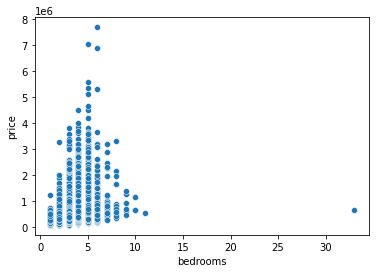

In [7]:
# look for outliers
sns.scatterplot(df['bedrooms'],df['price'])


In [8]:
# look for the specifics of that outlier
df.loc[df['bedrooms'] == 33]

id       date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895  6/25/2014  640000.0        33       1.75         1620   

       sqft_lot  floors waterfront  view  ...      grade sqft_above  \
15856      6000     1.0         NO  NONE  ...  7 Average       1040   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
15856          580.0     1947           0.0    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
15856           1330        4700  

[1 rows x 21 columns]

The house with 33 bedrooms only costs $640,000.  Also this house has 1.75 bathrooms.  This record holds an outlier and the rest of the features do not add up.  We will drop this outlier from our dataset.

In [9]:
# we will drop this outlier by using the record index.
df=df.drop(15856)

Check to see if we dropped the right record.

In [10]:
df.describe()


id         price      bedrooms     bathrooms   sqft_living  \
count  2.159600e+04  2.159600e+04  21596.000000  21596.000000  21596.000000   
mean   4.580575e+09  5.402920e+05      3.371828      2.115843   2080.343165   
std    2.876764e+09  3.673760e+05      0.904114      0.768998    918.122038   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308950e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     11.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159600e+04  21596.000000  21596.000000  21596.000000  17754.000000   
mean   1.509983e+04      1.494119   1788.631506   1971.000787     83.641489   
std    4.141355e+04      0.539685    827.763251     29.375460    399.957185   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.619000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068550e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21596.000000  21596.000000  21596.000000   21596.000000   21596.000000  
mean   98077.950685     47.560087   -122.213977    1986.650722   12758.656649  
std       53.514040      0.138552      0.140725     685.231768   27275.018316  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

we can confirm that we dropped the right record because max bedrooms is now 11.

#### Lets check the correlation between one of our features and 'price'

/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

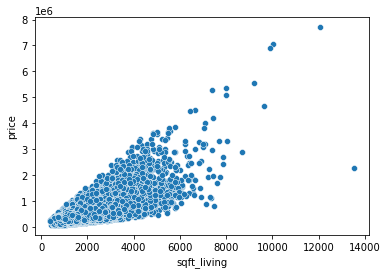

In [11]:
sns.scatterplot(df['sqft_living'],df['price'])

In [12]:
# look for the outlier on the far right
df.loc[df['sqft_living']== 13540].T

12764
id             1225069038
date             5/5/2014
price            2.28e+06
bedrooms                7
bathrooms               8
sqft_living         13540
sqft_lot           307752
floors                  3
waterfront             NO
view            EXCELLENT
condition         Average
grade           12 Luxury
sqft_above           9410
sqft_basement      4130.0
yr_built             1999
yr_renovated            0
zipcode             98053
lat               47.6675
long             -121.986
sqft_living15        4850
sqft_lot15         217800

This is a huge outlier in regards to 'sqft_living', so we are going to drop it.

In [13]:
# We again drop this record by using the record the index
df.drop(12764, inplace=True)

In [14]:
# Confirm that the record(12764) has been dropped from our dataframe.
df[12763:12766]

id       date     price  bedrooms  bathrooms  sqft_living  \
12763  7228500610  3/30/2015  510000.0         2        1.0         1070   
12765  5162100650  9/22/2014  316000.0         4        2.5         2320   
12766  3904902510  5/12/2014  690000.0         4        2.5         2670   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
12763      5280     1.0         NO  NONE  ...  6 Low Average       1070   
12765      7379     2.0         NO  NONE  ...         8 Good       2320   
12766     13463     2.0         NO  NONE  ...       9 Better       2670   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
12763            0.0     1900           NaN    98122  47.6168 -122.303   
12765            0.0     1987           0.0    98003  47.3432 -122.316   
12766              ?     1989           0.0    98029  47.5627 -122.018   

       sqft_living15  sqft_lot15  
12763           1380        2370  
12765           2230        7614  
12766           2560       10982  

[3 rows x 21 columns]

In [15]:
# check the one with the highest price
df.loc[df['price'] == df['price'].max()].T
# this one makes sense and it also look like it's following the trend

7245
id             6762700020
date           10/13/2014
price             7.7e+06
bedrooms                6
bathrooms               8
sqft_living         12050
sqft_lot            27600
floors                2.5
waterfront             NO
view                 GOOD
condition            Good
grade          13 Mansion
sqft_above           8570
sqft_basement      3480.0
yr_built             1910
yr_renovated         1987
zipcode             98102
lat               47.6298
long             -122.323
sqft_living15        3940
sqft_lot15           8800

## Data Cleaning

In [16]:
df['view'].value_counts()

NONE         19421
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      316
Name: view, dtype: int64

In [17]:
# See how many null values are in this column
df['view'].isna().sum()

63

In [18]:
#check to see where the houses with null values in view columns are
fig_null_view = px.scatter_mapbox(df[df['view'].isna()== True],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig_null_view.update_layout(mapbox_style='open-street-map')
fig_null_view.show()

- Most of these houses looks far away from the scenic spots like Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
- So we are going to fill in null values with NONE

In [19]:
# fill in the null values with None, assuming sometimes people don't fill it in when there's minimum view
df['view'] = df['view'].fillna('NONE')

In [20]:
# check our work
df['view'].isna().sum()

0

##### Convert categoricals into int or float values

the view column has categorical data.  We can easily convert this into numeric data with dictionary mapping.

In [21]:
# Map our string values to numeric values
view_dict = {'NONE': 1,
            'FAIR': 2,
             'AVERAGE':3,
            'GOOD': 4,
            'EXCELLENT': 5}
df['view'].replace(view_dict, inplace=True)

In [22]:
# check to see if there's null values in the column
df['condition'].isna().sum()

0

In [23]:
df['condition'].value_counts()

Average      14019
Good          5677
Very Good     1700
Fair           170
Poor            29
Name: condition, dtype: int64

In [24]:
# # Create dictionary for mapping onto condition
cond_dict = {'Poor': 1,
             'Fair': 2,
             'Average': 3,
             'Good': 4,
             'Very Good': 5}

In [25]:
# Replace categorical values with numeric values
df['condition'].replace(cond_dict, inplace=True)

In [26]:
df['grade'].value_counts().sort_index()

10 Very Good     1134
11 Excellent      399
12 Luxury          88
13 Mansion         13
3 Poor              1
4 Low              27
5 Fair            242
6 Low Average    2038
7 Average        8973
8 Good           6065
9 Better         2615
Name: grade, dtype: int64

In [27]:
# mapped dicitonary to change grade to numeric values
grade_dict = {'3 Poor': 3,
             '4 Low': 4,
             '5 Fair': 5,
             '6 Low Average': 6,
             '7 Average': 7,
             '8 Good': 8,
             '9 Better': 9,
             '10 Very Good': 10,
             '11 Excellent': 11,
             '12 Luxury': 12,
             '13 Mansion': 13}
df['grade'].replace(grade_dict, inplace=True)

In [28]:
df['grade'].value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [29]:
df['waterfront'].value_counts()

NO     19073
YES      146
Name: waterfront, dtype: int64

In [30]:
df['waterfront'].isna().sum()

2376

In [31]:
# look at where the houses with missing values in the waterfront column are
fig_waterfront = px.scatter_mapbox(df[df['waterfront'].isna()==True],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig_waterfront.update_layout(mapbox_style='open-street-map')
fig_waterfront.show()

In [32]:
# look at where the houses with YES in the waterfront column are
fig_waterfront_y = px.scatter_mapbox(df[df['waterfront']=='YES'],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig_waterfront_y.update_layout(mapbox_style='open-street-map')
fig_waterfront_y.show()

The id column does not relate to anything in our analysis so we can drop that column

In [33]:
df.drop('id', axis=1, inplace=True)

In [34]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

  waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
0        NaN     1          3      7        1180           0.0      1955   
1         NO     1          3      7        2170         400.0      1951   
2         NO     1          3      6         770           0.0      1933   
3         NO     1          5      7        1050         910.0      1965   
4         NO     1          3      8        1680           0.0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650  
1        1991.0    98125  47.7210 -122.319           1690        7639  
2           NaN    98028  47.7379 -122.233           2720        8062  
3           0.0    98136  47.5208 -122.393           1360        5000  
4           0.0    98074  47.6168 -122.045           1800        7503

### Visualize home prices to see if there's a pattern

In [35]:
loc_df = df[['lat', 'long', 'price']]

In [36]:
fig = px.scatter_mapbox(loc_df[loc_df['price'] < 2000000],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig.update_layout(mapbox_style='open-street-map')
fig.show()

It seems that the most expensive houses are concentrated around the central point in Lake Washington

In [37]:
# Add a distance column to indicate distance from the central point of seatle 47.6062° N, 122.3321° W
df['distance'] = np.sqrt((df['lat']-47.6062)**2 + (df['long'] + 122.3321)**2)

In [38]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

  waterfront  view  condition  ...  sqft_above  sqft_basement yr_built  \
0        NaN     1          3  ...        1180            0.0     1955   
1         NO     1          3  ...        2170          400.0     1951   
2         NO     1          3  ...         770            0.0     1933   
3         NO     1          5  ...        1050          910.0     1965   
4         NO     1          3  ...        1680            0.0     1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0           0.0    98178  47.5112 -122.257           1340        5650   
1        1991.0    98125  47.7210 -122.319           1690        7639   
2           NaN    98028  47.7379 -122.233           2720        8062   
3           0.0    98136  47.5208 -122.393           1360        5000   
4           0.0    98074  47.6168 -122.045           1800        7503   

   distance  
0  0.121099  
1  0.115545  
2  0.164820  
3  0.104890  
4  0.287296  

[5 rows x 21 columns]

##### Test Train Split

In [39]:
X = df.drop('price', axis=1)
y = df['price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
X_train

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
2358    3/25/2015         3       1.00         1040      8122     1.0   
6405     3/4/2015         3       2.50         1880      4499     2.0   
937     10/7/2014         3       2.50         2020      6564     1.0   
19076   1/16/2015         5       4.00         4720    493534     2.0   
18799   6/18/2014         4       2.25         2190      4080     2.0   
...           ...       ...        ...          ...       ...     ...   
11964   9/15/2014         3       2.50         2230      5800     2.0   
21577   3/17/2015         5       3.75         4170      8142     2.0   
5390    7/21/2014         4       1.50         1530      9000     1.0   
860     6/20/2014         1       0.75          380     15000     1.0   
15796  12/20/2014         5       2.00         1430      5600     1.5   

      waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
2358          NO     1          5      7        1040           0.0      1971   
6405          NO     1          3      8        1880           0.0      1993   
937           NO     1          3      7        1310         710.0      1994   
19076         NO     1          5      9        3960         760.0      1975   
18799         NO     1          3      8        1800         390.0      1918   
...          ...   ...        ...    ...         ...           ...       ...   
11964         NO     1          3      7        2230           0.0      2004   
21577         NO     3          3     10        4170           0.0      2006   
5390          NO     1          4      6        1530           0.0      1976   
860           NO     1          3      5         380           0.0      1963   
15796         NO     1          3      6        1430           0.0      1947   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
2358            0.0    98198  47.3731 -122.312           1470        8676   
6405            0.0    98029  47.5664 -121.999           2130        5114   
937             0.0    98042  47.3545 -122.158           1710        5151   
19076           0.0    98027  47.4536 -122.009           2160      219542   
18799           0.0    98119  47.6425 -122.358           2100        4080   
...             ...      ...      ...      ...            ...         ...   
11964           0.0    98065  47.5308 -121.847           2230        6088   
21577           NaN    98056  47.5354 -122.181           3030        7980   
5390            0.0    98014  47.6492 -121.908           1520        8500   
860             0.0    98168  47.4810 -122.323           1170       15000   
15796           NaN    98118  47.5192 -122.266           1860        5980   

       distance  
2358   0.233965  
6405   0.335469  
937    0.306045  
19076  0.357324  
18799  0.044593  
...         ...  
11964  0.490925  
21577  0.166865  
5390   0.426274  
860    0.125530  
15796  0.109262  

[16196 rows x 20 columns]

## Modeling

### Baseline Model

In [42]:
base_train_mean = y_train.mean()
base_train_mean

543303.2574709805

In [43]:
base_train_preds = [base_train_mean] * len(y_train)
base_test_preds = [base_train_mean] * len(y_test)

In [44]:
print(f"Train R2: {r2_score(y_train, base_train_preds)}")
print(f"Test R2: {r2_score(y_test, base_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, base_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, base_test_preds, squared = False)}")

Train R2: 0.0
Test R2: -0.001164501892552794
----
Train RMSE: 368714.2955544344
Test RMSE: 362612.29141276295


Interpretation: The baseline model predicts that every house has the value of the mean in this area. The model has very low R2 (close to zero) and the prediction is off by 362 thousand dollars on average.

### Explore Variables

In [45]:
# make a dataframe for our training data
df_train=pd.concat([y_train, X_train], axis = 1)
df_train

price        date  bedrooms  bathrooms  sqft_living  sqft_lot  \
2358    234000.0   3/25/2015         3       1.00         1040      8122   
6405    529000.0    3/4/2015         3       2.50         1880      4499   
937     253000.0   10/7/2014         3       2.50         2020      6564   
19076   745000.0   1/16/2015         5       4.00         4720    493534   
18799   855000.0   6/18/2014         4       2.25         2190      4080   
...          ...         ...       ...        ...          ...       ...   
11964   440000.0   9/15/2014         3       2.50         2230      5800   
21577  1090000.0   3/17/2015         5       3.75         4170      8142   
5390    299800.0   7/21/2014         4       1.50         1530      9000   
860     245000.0   6/20/2014         1       0.75          380     15000   
15796   133000.0  12/20/2014         5       2.00         1430      5600   

       floors waterfront  view  condition  ...  sqft_above  sqft_basement  \
2358      1.0         NO     1          5  ...        1040            0.0   
6405      2.0         NO     1          3  ...        1880            0.0   
937       1.0         NO     1          3  ...        1310          710.0   
19076     2.0         NO     1          5  ...        3960          760.0   
18799     2.0         NO     1          3  ...        1800          390.0   
...       ...        ...   ...        ...  ...         ...            ...   
11964     2.0         NO     1          3  ...        2230            0.0   
21577     2.0         NO     3          3  ...        4170            0.0   
5390      1.0         NO     1          4  ...        1530            0.0   
860       1.0         NO     1          3  ...         380            0.0   
15796     1.5         NO     1          3  ...        1430            0.0   

      yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
2358      1971           0.0    98198  47.3731 -122.312           1470   
6405      1993           0.0    98029  47.5664 -121.999           2130   
937       1994           0.0    98042  47.3545 -122.158           1710   
19076     1975           0.0    98027  47.4536 -122.009           2160   
18799     1918           0.0    98119  47.6425 -122.358           2100   
...        ...           ...      ...      ...      ...            ...   
11964     2004           0.0    98065  47.5308 -121.847           2230   
21577     2006           NaN    98056  47.5354 -122.181           3030   
5390      1976           0.0    98014  47.6492 -121.908           1520   
860       1963           0.0    98168  47.4810 -122.323           1170   
15796     1947           NaN    98118  47.5192 -122.266           1860   

       sqft_lot15  distance  
2358         8676  0.233965  
6405         5114  0.335469  
937          5151  0.306045  
19076      219542  0.357324  
18799        4080  0.044593  
...           ...       ...  
11964        6088  0.490925  
21577        7980  0.166865  
5390         8500  0.426274  
860         15000  0.125530  
15796        5980  0.109262  

[16196 rows x 21 columns]

In [46]:
# pick the variables we are interested in and numeric
# see correlations between them and the target
df_explore=df_train.drop(['date', 'waterfront','zipcode', 'lat', 'long', 'sqft_basement'],axis=1)

In [47]:
df_explore.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.703730
grade            0.669421
sqft_above       0.603381
sqft_living15    0.590540
bathrooms        0.529581
view             0.399880
bedrooms         0.318156
floors           0.254563
yr_renovated     0.131064
sqft_lot         0.084421
sqft_lot15       0.080234
yr_built         0.049700
condition        0.041514
distance        -0.194612
Name: price, dtype: float64

<AxesSubplot:>

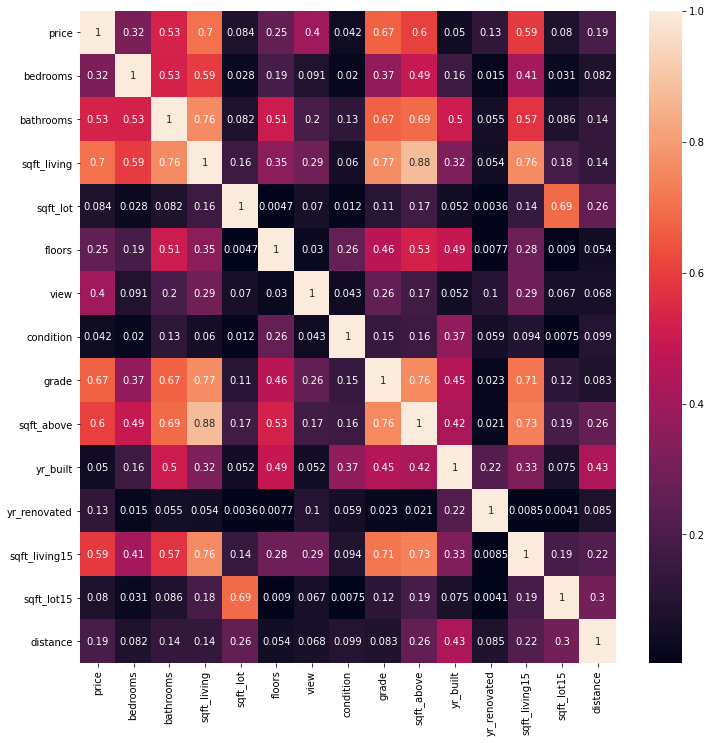

In [48]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_explore.corr().abs(), annot=True)

### Simple Model

Model the variable that has the highest correlation with price, which is sqft_living

In [49]:
simple_formula='price ~ sqft_living'
simple_model = ols(simple_formula, df_train).fit()
simple_model_summ = simple_model.summary()
simple_model_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.589e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:21:07   Log-Likelihood:            -2.2504e+05
No. Observations:               16196   AIC:                         4.501e+05
Df Residuals:                   16194   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.726e+04   5117.509     -9.236      0.000   -5.73e+04   -3.72e+04
sqft_living   283.3842      2.248    126.049      0.000     278.977     287.791
==============================================================================
Omnibus:                    10297.337   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           273144.164
Skew:                           2.625   Prob(JB):                         0.00
Kurtosis:                      22.422   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
simple_train_preds=simple_model.predict(X_train)
simple_test_preds=simple_model.predict(X_test)

In [51]:
print(f"Train R2: {r2_score(y_train, simple_train_preds)}")
print(f"Test R2: {r2_score(y_test, simple_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, simple_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, simple_test_preds, squared = False)}")



Train R2: 0.4952362517108302
Test R2: 0.485165704048819
----
Train RMSE: 261959.44067163262
Test RMSE: 260030.04727585663


#### Since we are doing a lot of assessment of our models, we can use a function for this repetitive work

Before we build the function, we are going to scale our variables so that we can build in a scaled model into the function to better assess the model

In [74]:
df_scaled = (df_explore - np.mean(df_explore)) / np.std(df_explore)

In [75]:
df_scaled.head()

price  bedrooms  bathrooms  sqft_living   sqft_lot    floors  \
2358  -0.838870 -0.412724  -1.452636    -1.140179  -0.166984 -0.918269   
6405  -0.038792 -0.412724   0.500127    -0.222779  -0.252490  0.932553   
937   -0.787339 -0.412724   0.500127    -0.069879  -0.203754 -0.918269   
19076  0.547027  1.800680   2.452891     2.878907  11.289175  0.932553   
18799  0.845361  0.693978   0.174667     0.115785  -0.262378  0.932553   

           view  condition     grade  sqft_above  yr_built  yr_renovated  \
2358  -0.304933   2.448058 -0.565942   -0.908852  0.000646     -0.207148   
6405  -0.304933  -0.629305  0.287503    0.105065  0.750130     -0.207148   
937   -0.304933  -0.629305 -0.565942   -0.582950  0.784198     -0.207148   
19076 -0.304933   2.448058  1.140947    2.615719  0.136916     -0.207148   
18799 -0.304933  -0.629305  0.287503    0.008502 -1.804930     -0.207148   

       sqft_living15  sqft_lot15  distance  
2358       -0.756043   -0.150490  0.276514  
6405        0.202358   -0.281233  1.112079  
937        -0.407533   -0.279875  0.869866  
19076       0.245922    7.589336  1.291982  
18799       0.158794   -0.319186 -1.282366

bedrooms  sqft_living
bedrooms     1.000000     0.578212
sqft_living  0.578212     1.000000

In [79]:
#subfunction that takes a list of variables and give us a model for these variables
def model(ind_variable, data):
    formula = 'price ~ ' + ' + '.join(ind_variable)
    multi_model = ols(formula, data).fit()
    multi_model_summ = multi_model.summary()
    return multi_model,multi_model_summ

In [81]:
def assess(multi_model):
    
    tr_preds=multi_model.predict(X_train)
    te_preds=multi_model.predict(X_test)
    y_tr = y_train
    y_te = y_test
    print(f"Train R2: {r2_score(y_tr, tr_preds)}")
    print(f"Test R2: {r2_score(y_te, te_preds)}")
    print('----')
    print(f"Train RMSE: {mean_squared_error(y_tr, tr_preds, squared = False)}")
    print(f"Test RMSE: {mean_squared_error(y_te, te_preds, squared = False)}")
    print('----')
    print(f"Train MAE: {mean_absolute_error(y_tr, tr_preds)}")
    print(f"Test MAE: {mean_absolute_error(y_te, te_preds)}")

    tr_res= y_tr - tr_preds
    te_res= y_te - te_preds
    
    plt.scatter(tr_preds, tr_res, label = 'Train')
    plt.scatter(te_preds, te_res, label = 'Test')
    
    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show

In [94]:
def scaled_model(ind_variable, data):
    formula = 'price ~ ' + ' + '.join(ind_variable)
    data_scaled = (data - np.mean(data)) / np.std(data)
    model_scaled = ols(formula, data_scaled).fit()
    model_scaled_summ = model_scaled.summary()
    return model_scaled_summ

In [125]:
def model_and_assess(ind_variable,data):
    multi_model, multi_model_summ = model(ind_variable,data)
    assessment = assess(multi_model)
    scaled_summ = scaled_model(ind_variable,data)
    print('        ')
    print('This is the summary of the model')
    print('        ')
    print(multi_model_summ)
    print('        ')
    print('This is the summary of the scaled model')
    print('        ')
    print(scaled_summ)
    print('        ')
    print('This is the correlation table between variables')
    print('        ')
    print(data[ind_variable].corr())
    print('        ')
    print('This is the residual plot of the model')
    print('        ')
    print(assessment)

Check to see if the function works

Train R2: 0.4952362517108302
Test R2: 0.485165704048819
----
Train RMSE: 261959.44067163262
Test RMSE: 260030.04727585663
----
Train MAE: 174968.5898736924
Test MAE: 172486.3626611587


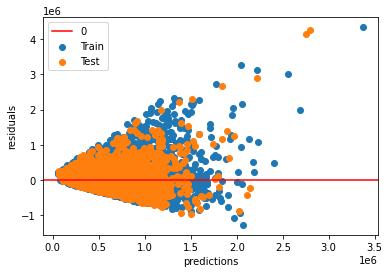

In [53]:
assess(simple_model)

In [105]:
model(['sqft_living'],df_explore)

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f8f425472e0>,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.495
 Model:                            OLS   Adj. R-squared:                  0.495
 Method:                 Least Squares   F-statistic:                 1.589e+04
 Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
 Time:                        21:01:39   Log-Likelihood:            -2.2504e+05
 No. Observations:               16196   AIC:                         4.501e+05
 Df Residuals:                   16194   BIC:                         4.501e+05
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.02

In [106]:
scaled_model(['sqft_living'],df_explore)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.589e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:02:20   Log-Likelihood:                -17445.
No. Observations:               16196   AIC:                         3.489e+04
Df Residuals:                   16194   BIC:                         3.491e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.088e-16      0.006  -5.53e-14      1.000      -0.011       0.011
sqft_living     0.7037      0.006    126.049      0.000       0.693       0.715
==============================================================================
Omnibus:                    10297.337   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           273144.164
Skew:                           2.625   Prob(JB):                         0.00
Kurtosis:                      22.422   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation: 
- The simple model is a big improvement from the baseline. R2 is 0.50 for training data and 0.49 for testing data and the prediction is off by around 260 thousand dollars on average. The R2 is still low and the RMSE is still too high. Model needs iteration.
- The error is not homoskatistic, the higher the price, the further off our prediction is.

### Add in location data 

Distance has a very low correlation with sqft_living (0.14) and a negative correlation with price (-0.19), our target.

Train R2: 0.5824307619937236
Test R2: 0.5699447735803826
----
Train RMSE: 238261.69368372794
Test RMSE: 237657.71376503847
----
Train MAE: 156297.55767084312
Test MAE: 153430.6288800573
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                 1.129e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:35:27   Log-Likelihood:            -2.2351e+05
No. Observations:               16196   AIC:                         4.470e+05
Df Residuals:                   16193   BIC:                         4.470e+05
Df Model:                           2                                         
Covariance Type:            nonrobust               

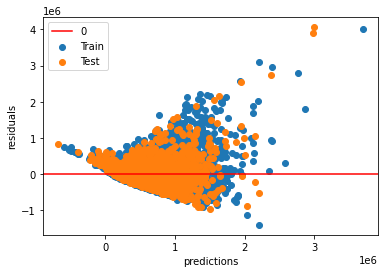

In [126]:
model_and_assess(['sqft_living', 'distance'],df_explore)

Interpretation:
- The sqft_living/distance model is a small improvement from the simple model based only on sqft_living. R2 increased from 0.50 to 0.58 for training data and 0.49 to 0.56 for testing data. The prediction is off by around 237 thousand dollars on average. The R2 is still low and the RMSE is still too high. Model needs iteration.
- The error is not homoskatistic, the error seems to be worse for houses at both end of the price spectrum and we need to find a way to account for that

In [56]:
# check to see where the expensive houses (1.5M +) are 
fig_expensive = px.scatter_mapbox(df[df['price']>1500000],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig_expensive.update_layout(mapbox_style='open-street-map')
fig_expensive.show()

It seems that the most expensive houses are either next to the mountain or next to the water, so let's try taking into account the view column.

Train R2: 0.6114879141149215
Test R2: 0.6009633543682957
----
Train RMSE: 229822.34032460174
Test RMSE: 228926.5643055346
----
Train MAE: 152212.45790718295
Test MAE: 148434.8540821891
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     8495.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:36:10   Log-Likelihood:            -2.2292e+05
No. Observations:               16196   AIC:                         4.459e+05
Df Residuals:                   16192   BIC:                         4.459e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                

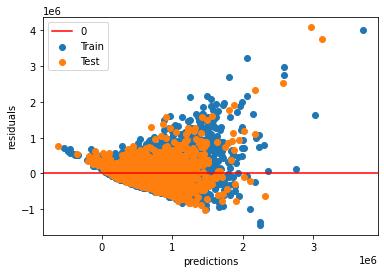

In [127]:
model_and_assess(['sqft_living', 'distance', 'view'], df_explore)

Interpretation:
- The sqft_living/distance model is a small improvement from the simple model based only on sqft_living. R2 increased from 0.58 to 0.61 for training data and 0.56 to 0.60 for testing data. The prediction is off by around 229 thousand dollars on average. The R2 is still relatively low and the RMSE is still too high. Model needs iteration.
- The error is not homoskatistic, the error still seems to be worse for houses at both end of the price spectrum and this model is still not accounting for it
- max correlation between independent variables is 0.29, acceptable.

### Add in condition data

Condition has low correlation with existing variables (sqft_living, distance, view) so let's add that in and see what happens.

Train R2: 0.6137961364727814
Test R2: 0.6014253560422257
----
Train RMSE: 229138.61470255128
Test RMSE: 228794.00118365703
----
Train MAE: 151652.0233516485
Test MAE: 148399.1291191273
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     6433.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:40:17   Log-Likelihood:            -2.2287e+05
No. Observations:               16196   AIC:                         4.458e+05
Df Residuals:                   16191   BIC:                         4.458e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                

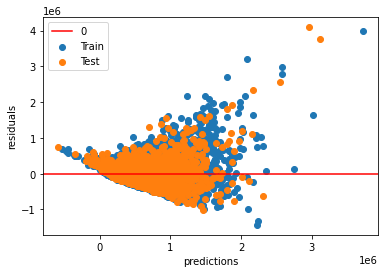

In [151]:
model_and_assess(['sqft_living', 'distance', 'view', 'condition'], df_explore)

Interpretation:
- The model is a tiny improvement from the previous one. R2 increased from 0.611 to 0.614 for training data, but R2 for testing data is basically the same. The R2 is still relatively low and the RMSE is still too high. Model needs iteration.
- The error is not homoskatistic, the error still seems to be worse for houses at both end of the price spectrum and this model is still not accounting for it
- max correlation between independent variables is 0.29, acceptable.

## Feature Engineering

Now we seems to run out of variables to add without having a collinearity probolem, so we need to start looking into feature engineering.

sqft_living, bedrooms, bathrooms and grade has high correlations with each other as well as our target price, so let's find a way to account for them while adhereing to linear regression assumptions.

In [153]:
# look at out training dataset with these columns

In [156]:
df_coll=df_explore[['price','sqft_living', 'bedrooms', 'bathrooms', 'grade']]
df_coll

price  sqft_living  bedrooms  bathrooms  grade
2358    234000.0         1040         3       1.00      7
6405    529000.0         1880         3       2.50      8
937     253000.0         2020         3       2.50      7
19076   745000.0         4720         5       4.00      9
18799   855000.0         2190         4       2.25      8
...          ...          ...       ...        ...    ...
11964   440000.0         2230         3       2.50      7
21577  1090000.0         4170         5       3.75     10
5390    299800.0         1530         4       1.50      6
860     245000.0          380         1       0.75      5
15796   133000.0         1430         5       2.00      6

[16196 rows x 5 columns]

In [157]:
# find correlation between columns
df_coll.corr()

price  sqft_living  bedrooms  bathrooms     grade
price        1.000000     0.703730  0.318156   0.529581  0.669421
sqft_living  0.703730     1.000000  0.594390   0.761228  0.765367
bedrooms     0.318156     0.594390  1.000000   0.528151  0.368958
bathrooms    0.529581     0.761228  0.528151   1.000000  0.669794
grade        0.669421     0.765367  0.368958   0.669794  1.000000

Let's forget about linear regression assumptions for a second and just throw all of these variables into the model

Train R2: 0.6587447703211995
Test R2: 0.643389417229028
----
Train RMSE: 215392.03225615516
Test RMSE: 216414.77803042997
----
Train MAE: 140253.07741490024
Test MAE: 137001.47595469165
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     4464.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:03:03   Log-Likelihood:            -2.2187e+05
No. Observations:               16196   AIC:                         4.438e+05
Df Residuals:                   16188   BIC:                         4.438e+05
Df Model:                           7                                         
Covariance Type:            nonrobust               

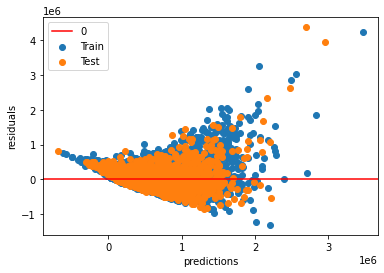

In [158]:
model_and_assess(['sqft_living', 'distance', 'view', 'condition', 'bedrooms', 'bathrooms', 'grade'], df_explore)

- We can see that the number of bedrooms have a negative coefficient which means the higher the number of bedrooms, the lower the price, which doesn't make too much sense on its own, but if we consider that the model already takes into account the total square footage of the living space in the home, we suspect that the more luxurious a house, the bigger the rooms are going to be, so the more bedrooms there are at any given square footage, the less the price is going to be. 

- So let's see what we can do in terms of engineering a variable that's a function of sqft_living and bedrooms

We can have an estimate of how big an average room is in the house, accounting for living room and dinning room but exclude bathrooms.

In [159]:
df_coll['room_size'] = df_coll['sqft_living']/(df_coll['bedrooms'] + 2)
df_coll

<ipython-input-159-d780a5ff0cdb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



price  sqft_living  bedrooms  bathrooms  grade   room_size
2358    234000.0         1040         3       1.00      7  208.000000
6405    529000.0         1880         3       2.50      8  376.000000
937     253000.0         2020         3       2.50      7  404.000000
19076   745000.0         4720         5       4.00      9  674.285714
18799   855000.0         2190         4       2.25      8  365.000000
...          ...          ...       ...        ...    ...         ...
11964   440000.0         2230         3       2.50      7  446.000000
21577  1090000.0         4170         5       3.75     10  595.714286
5390    299800.0         1530         4       1.50      6  255.000000
860     245000.0          380         1       0.75      5  126.666667
15796   133000.0         1430         5       2.00      6  204.285714

[16196 rows x 6 columns]

In [160]:
df_coll.corr()

price  sqft_living  bedrooms  bathrooms     grade  room_size
price        1.000000     0.703730  0.318156   0.529581  0.669421   0.674468
sqft_living  0.703730     1.000000  0.594390   0.761228  0.765367   0.925059
bedrooms     0.318156     0.594390  1.000000   0.528151  0.368958   0.275223
bathrooms    0.529581     0.761228  0.528151   1.000000  0.669794   0.677765
grade        0.669421     0.765367  0.368958   0.669794  1.000000   0.751375
room_size    0.674468     0.925059  0.275223   0.677765  0.751375   1.000000

- Room size has a high correlation with sqft_living so it's maybe not the best idea to include it in our model

We can also have an estimate of how compact the house is, calculated by the number of bedrooms divided by the square footage of the house.

In [161]:
df_coll['compactness'] = df_coll['bedrooms']/df_coll['sqft_living']
df_coll

<ipython-input-161-f7b6cb0a044e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



price  sqft_living  bedrooms  bathrooms  grade   room_size  \
2358    234000.0         1040         3       1.00      7  208.000000   
6405    529000.0         1880         3       2.50      8  376.000000   
937     253000.0         2020         3       2.50      7  404.000000   
19076   745000.0         4720         5       4.00      9  674.285714   
18799   855000.0         2190         4       2.25      8  365.000000   
...          ...          ...       ...        ...    ...         ...   
11964   440000.0         2230         3       2.50      7  446.000000   
21577  1090000.0         4170         5       3.75     10  595.714286   
5390    299800.0         1530         4       1.50      6  255.000000   
860     245000.0          380         1       0.75      5  126.666667   
15796   133000.0         1430         5       2.00      6  204.285714   

       compactness  
2358      0.002885  
6405      0.001596  
937       0.001485  
19076     0.001059  
18799     0.001826  
...            ...  
11964     0.001345  
21577     0.001199  
5390      0.002614  
860       0.002632  
15796     0.003497  

[16196 rows x 7 columns]

In [162]:
df_coll.corr()

price  sqft_living  bedrooms  bathrooms     grade  room_size  \
price        1.000000     0.703730  0.318156   0.529581  0.669421   0.674468   
sqft_living  0.703730     1.000000  0.594390   0.761228  0.765367   0.925059   
bedrooms     0.318156     0.594390  1.000000   0.528151  0.368958   0.275223   
bathrooms    0.529581     0.761228  0.528151   1.000000  0.669794   0.677765   
grade        0.669421     0.765367  0.368958   0.669794  1.000000   0.751375   
room_size    0.674468     0.925059  0.275223   0.677765  0.751375   1.000000   
compactness -0.487267    -0.701054  0.007592  -0.541720 -0.610120  -0.861883   

             compactness  
price          -0.487267  
sqft_living    -0.701054  
bedrooms        0.007592  
bathrooms      -0.541720  
grade          -0.610120  
room_size      -0.861883  
compactness     1.000000

In [163]:
df_1.corr()

price  sqft_living  bedrooms  sqft/bed  bed/sqft
price        1.000000     0.703730  0.318156  0.578189 -0.487267
sqft_living  0.703730     1.000000  0.594390  0.752802 -0.701054
bedrooms     0.318156     0.594390  1.000000 -0.023466  0.007592
sqft/bed     0.578189     0.752802 -0.023466  1.000000 -0.900206
bed/sqft    -0.487267    -0.701054  0.007592 -0.900206  1.000000

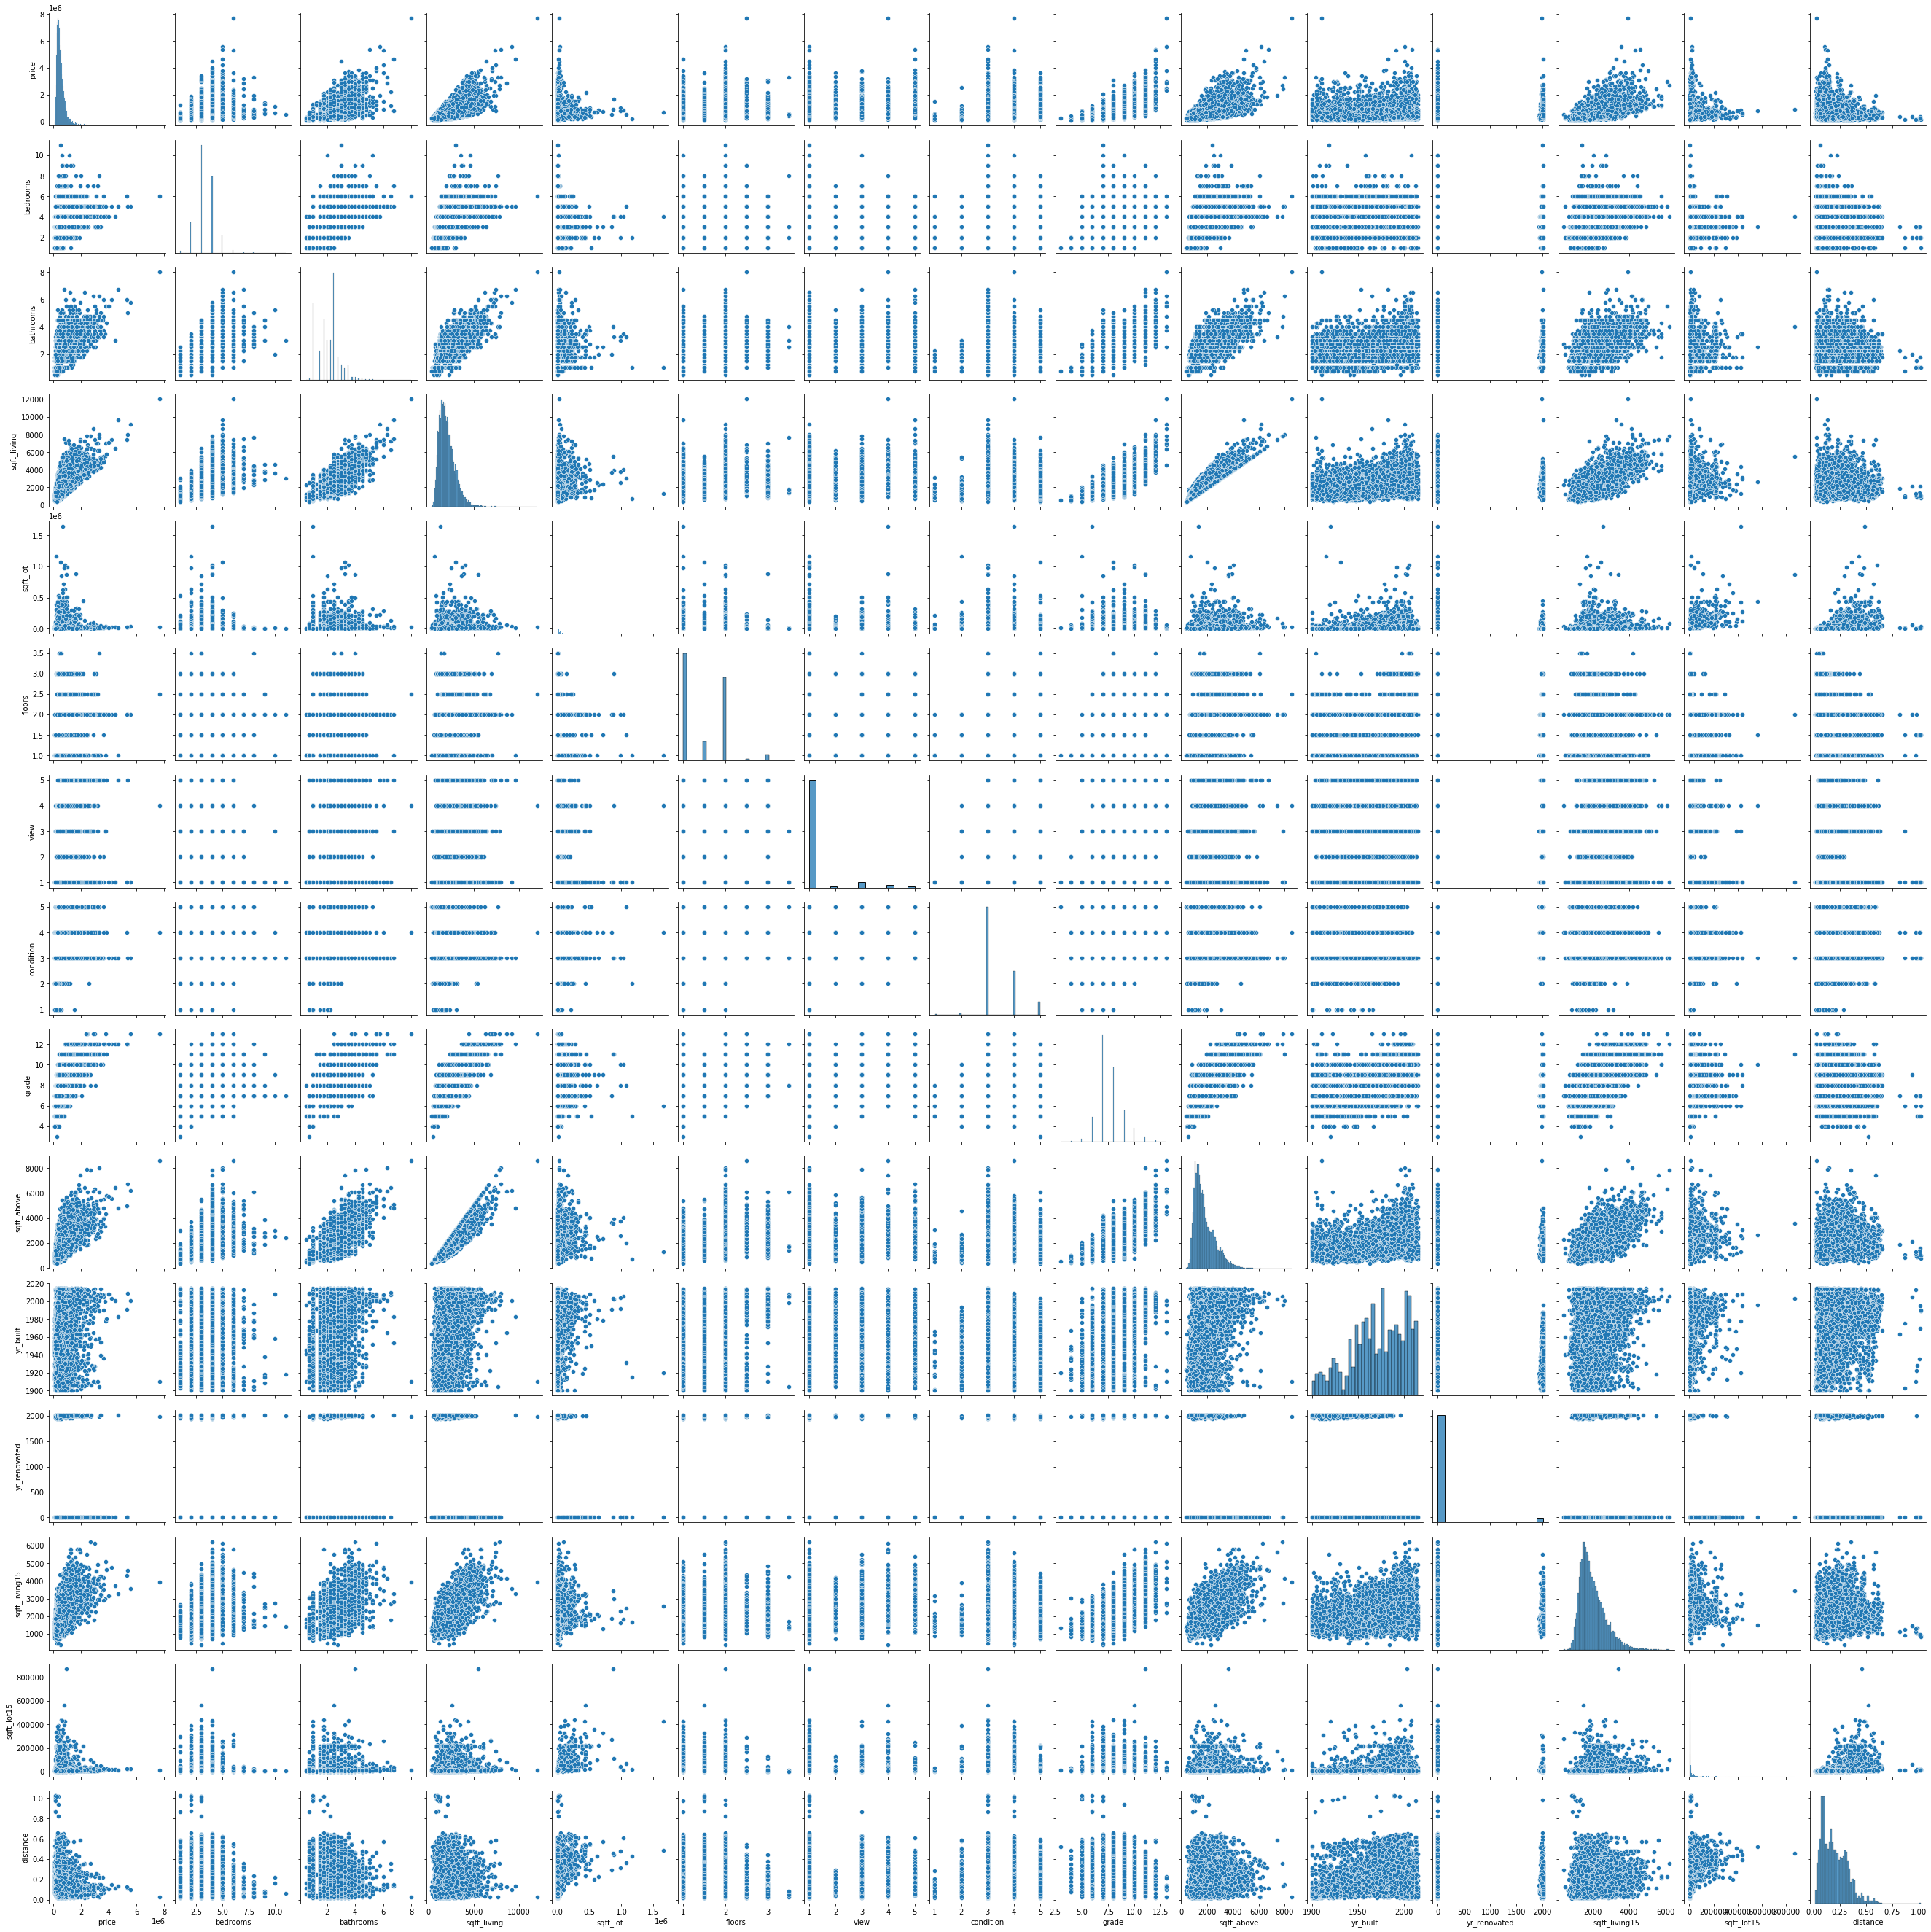

In [164]:
sns.pairplot(df_explore)